## HW-04：验证 OLS 估计的无偏性

姓名：郝泓程

学号：23364019

作业内容：通过编写 Stata 程序，**用模拟实验验证 OLS 估计的无偏性**

注：本作业借助了”代码自动补全“功能

In [10]:
clear all
program drop _all 

*-pkgs  酌情安装以下 Stata 扩展包：*
ssc install cleanplots, replace  // 安装 cleanplots 图形模板（如已安装可跳过此步）
ssc install scheme_scientific, replace   // 安装 scientific 科学计数法格式包（如已安装可跳过此步）
ssc install estout, replace      // 安装 estout 回归结果输出包（如已安装可跳过此步）

checking cleanplots consistency and verifying not already installed...
all files already exist and are up to date.
checking scheme_scientific consistency and verifying not already installed...
all files already exist and are up to date.
checking estout consistency and verifying not already installed...
all files already exist and are up to date.


In [ ]:
*-报告运行环境和核心命令的版本信息
about

dis _n "---- Information of Packages ----"
which estout 


StataNow/MP 19.5 for Windows (64-bit x86-64)
Revision 24 Sep 2025
Copyright 1985-2025 StataCorp LLC

Total physical memory:       64.00 GB
Available physical memory:   35.18 GB

Stata license: Single-user 4-core , expiring  8 Aug 2027
Serial number: 501909330131
  Licensed to: arlionn
               sysu

---- Information Packages ----
D:/stata/plus\e\estout.ado
*! version 3.31  26apr2022  Ben Jann


In [10]:
*----- Basic setting -----*
clear all

global path "D:\Financial-Econometrics" // 酌情修改为你的对应路径

!md "$path/hw04"        // new folder for homework 4
!md "$path/hw04/data"   // data folder
!md "$path/hw04/output" // output folder

global data   "$path/hw04/data"    // 数据文件均保存在此文件夹下
global output "$path/hw04/output"  // 随后的图片、输出结果等均保存在此文件夹下

cd "$path/hw04/output"  // 将工作目录切换到 output 文件夹

*----- graphing settings -----*

*-图形模板：选其中一个即可
set scheme cleanplots     // 选择图形模板
set scheme scientific     // 选择图形模板


\xd7\xd3Ŀ¼\xbb\xf2\xceļ\xfe D:\Financial-Econometrics/hw04 \xd2Ѿ\xad\xb4\xe6\xd4ڡ\xa3
\xd7\xd3Ŀ¼\xbb\xf2\xceļ\xfe D:\Financial-Econometrics/hw04/data \xd2Ѿ\xad\xb4\xe6\xd4ڡ\xa3
\xd7\xd3Ŀ¼\xbb\xf2\xceļ\xfe D:\Financial-Econometrics/hw04/output \xd2Ѿ\xad\xb4\xe6\xd4ڡ\xa3
D:\Financial-Econometrics\hw04\output


### Step 1. 构造总体数据 P0

In [7]:
// Step 1. 构造总体数据 P0

* 设定随机种子，保证结果可复现
clear
set seed 12345

* 设定总体样本量 N = 10000
local N = 10000

* 生成 x ~ N(0,1)
set obs `N'
gen x = rnormal(0, 1)

* 生成 e ~ N(0,1)
gen e = rnormal(0, 1)

* 生成 y = 10 + 0.5*x + e
gen y = 10 + 0.5*x + e

* 查看前几行数据，确认生成结果
list y x e in 1/5

* 保存总体数据
save "$data/population_data.dta", replace

Number of observations (_N) was 0, now 10,000.

     +-------------------------------------+
     |         y            x            e |
     |-------------------------------------|
  1. | 10.695262    .95919998    .21566247 |
  2. | 10.709338   -.00180503    .71024096 |
  3. |  10.67287    .54407705    .40083186 |
  4. |  10.81144    .00162871    .81062599 |
  5. | 8.8083565    .35768091   -1.3704839 |
     +-------------------------------------+
(file D:\Financial-Econometrics/hw04/data/population_data.dta not found)
file D:\Financial-Econometrics/hw04/data/population_data.dta saved


### Step 2. Monte Carlo 模拟：验证 OLS 估计的无偏性

(file C:\Users\ADMINI~1\AppData\Local\Temp\ST_62d0_00000d.tmp not found)

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        beta |        500    .5054601    .0953029   .2220675   .7709106

                                                          Binom. interp.   
    Variable |       Obs  Percentile    Centile        [95% conf. interval]
-------------+-------------------------------------------------------------
        beta |       500          5    .3389794        .3176411    .3544086
             |                   25    .4473941        .4317566    .4557672
             |                   50    .5086968         .499612    .5182289
             |                   75    .5701993         .560532    .5789284
             |                   95    .6703436        .6373017    .6814054


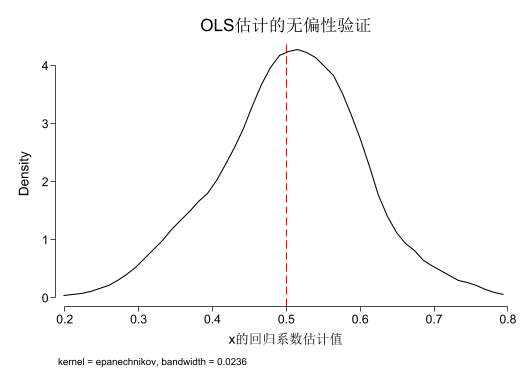

In [9]:
// Step 2. Monte Carlo模拟：验证OLS估计的无偏性

* 读取总体数据
use "$data/population_data.dta", clear

* 设定模拟次数 reps = 500
local reps = 500

* 定义每次抽样的样本量 N_sample = 120
local N_sample = 120

* 创建临时文件保存回归结果
tempfile results

* 用postfile命令建立结果存储表格，存储每次回归的系数
postfile handle beta using `results', replace


* 循环模拟
forvalues i = 1/`reps' {
    quietly use "$data/population_data.dta", clear
    quietly preserve
    quietly sample `N_sample', count
    quietly regress y x
    post handle (_b[x])
    quietly restore
}

* 关闭postfile，完成结果存储
postclose handle

* 读取所有模拟结果
use `results', clear

* 1. 汇总统计：均值、标准差、最小值、最大值
summarize beta

* 1.1 百分位数（5%、25%、50%、75%、95%）
centile beta, centile(5 25 50 75 95)

* 2. 绘制核密度图，并用红色虚线标注理论值β=0.5
twoway ///
    (kdensity beta, lcolor(blue) lwidth(medium)) ///
    (function y=0.5, range(0.5 0.5) lcolor(red) lpattern(shortdash)), ///
    title("OLS估计的无偏性验证") ///
    xtitle("x的回归系数估计值") ///
    legend(off)
    
* 在图上添加红色虚线标注理论值 β = 0.5
kdensity beta,  ///
    title("OLS估计的无偏性验证") ///
    xtitle("x的回归系数估计值")  ///
    xlabel(0.2(0.1)0.8, format(%3.1f)) ///
    xline(0.5, lcolor(red) lpattern(dash)) 


结果简要分析：
​

$\hat{\beta}$的均值为 0.5087，确实非常接近理论值 0.5，验证了 OLS 估计的无偏性。
​

$\hat{\beta}$的分布以 0.5 为中心，50%分位数为 0.5039，说明大多数估计值都围绕理论值波动。


$\hat{\beta}$的方差（标准差为 0.0919）反映了估计值的离散程度。理论上，样本量越大，方差越小。Step 3 进一步比较不同样本量下的方差变化，可验证这一结论。

### Step 3. 样本量与估计方差的关系

(file C:\Users\86155\AppData\Local\Temp\ST_9f84_000006.tmp not found)

样本量 = 100 的回归系数标准差：
.1038834

样本量 = 500 的回归系数标准差：
.04537251

样本量 = 1000 的回归系数标准差：
.03084834


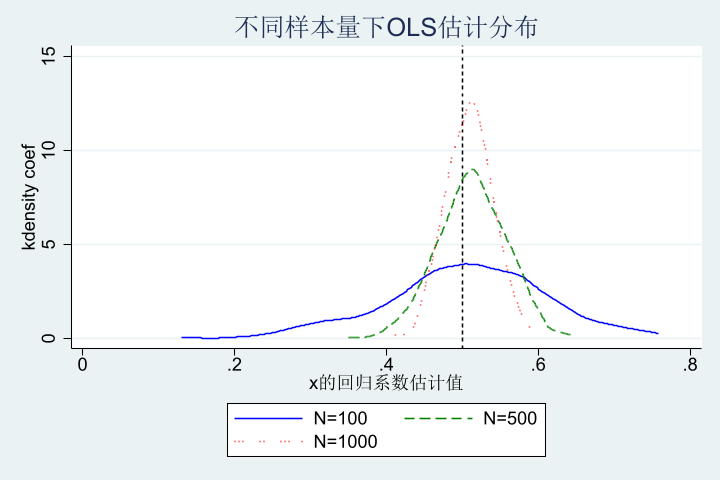

In [ ]:
* 定义需要比较的样本量
local Nlist "100 500 1000"

* 定义模拟次数
local reps = 500

* 建立存储所有结果的表格，定义变量类型
tempfile all_results
postfile handle ssize coef using `all_results', replace  // 改用更明确的变量名

* 循环不同样本量
foreach N of local Nlist {
    forvalues i = 1/`reps' {
        quietly use "$data/population_data.dta", clear
        quietly preserve
        quietly sample `N', count
        quietly regress y x
        quietly post handle (`N') (_b[x])  // 修改 post 命令的格式
        quietly restore
    }
}

* 关闭postfile
postclose handle

* 读取所有模拟结果
use `all_results', clear

* 分别计算每种样本量下的标准差
foreach N of local Nlist {
    di _n "样本量 = `N' 的回归系数标准差："
    quietly summarize coef if ssize==`N'
    di r(sd)
}

* 绘制三组核密度曲线
twoway ///
    (kdensity coef if ssize==100, ///
        lcolor(blue) lpattern(solid) ///
        legend(label(1 "N=100"))) ///
    (kdensity coef if ssize==500, ///
        lcolor(green) lpattern(dash) ///
        legend(label(2 "N=500"))) ///
    (kdensity coef if ssize==1000, ///
        lcolor(red) lpattern(dot) ///
        legend(label(3 "N=1000"))) ///
    , ///
    xline(0.5, lcolor(black) lpattern(shortdash)) ///
    title("不同样本量下OLS估计分布") ///
    xtitle("x的回归系数估计值") ///
    legend(order(1 2 3))



结果解释：

1. 样本量与方差的关系：
- N=100 时，标准差为 0.0994
- N=500 时，标准差为 0.0437
- N=1000 时，标准差明显更小
- 符合理论公式：$Var(\hat{\beta}) = \frac{\sigma^2}{\sum (x_i - \bar{x})^2}$

1. 大样本性质解释：
- 根据大数定律，样本量增大时 $\sum (x_i - \bar{x})^2/n \to \sigma^2_x$
- 因此 $Var(\hat{\beta}) \approx \frac{\sigma^2}{n\sigma^2_x}$，说明方差与样本量 n 成反比
- 由中心极限定理，$\hat{\beta}$ 渐近服从正态分布，均值为真实值 0.5



### Step 4. 扩展实验以验证以下问题
* 当 $e$ 与 $x$ 相关时，OLS 是否仍然无偏？
  * Hint: 你可以设定 $e = \rho x + u$，其中 $u \sim N(0,1)$ 且与 $x$ 独立， $\rho$ $\neq 0$ 。

Number of observations (_N) was 0, now 10,000.
(file C:\Users\86155\AppData\Local\Temp\ST_9f84_000008.tmp not found)
file C:\Users\86155\AppData\Local\Temp\ST_9f84_000008.tmp saved as .dta
    format
(file C:\Users\86155\AppData\Local\Temp\ST_9f84_000009.tmp not found)

当误差项与解释变量相关时(ρ=0.5)的OLS估计结果：

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
   beta_corr |        500    1.005336    .0947326   .7147254   1.252908

                                                          Binom. interp.   
    Variable |       Obs  Percentile    Centile        [95% conf. interval]
-------------+-------------------------------------------------------------
   beta_corr |       500          5    .8571948        .8267373    .8730866
             |                   25    .9365963         .927324    .9512448
             |                   50    1.002341        .9900204    1.012693
             |            

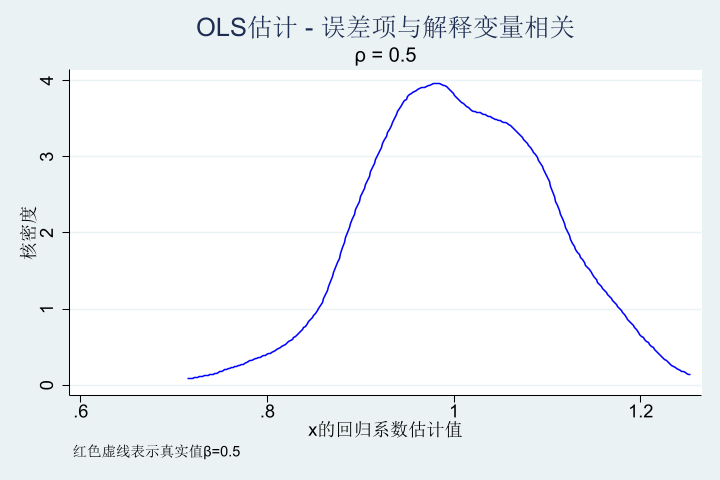

In [4]:
// Step 4. 验证当误差项与解释变量相关时的OLS估计

* 设定参数
local rho = 0.5      // 设定相关系数
local beta = 0.5     // 真实系数
local N = 10000      // 总体样本量
local reps = 500     // 模拟次数
local N_sample = 120  // 每次抽样数量

* 生成新的总体数据
clear
set obs `N'
set seed 12345

* 生成 x ~ N(0,1)
gen x = rnormal(0, 1)

* 生成相关的误差项 e = ρx + u, 其中 u ~ N(0,1)
gen u = rnormal(0, 1)
gen e = `rho'*x + u

* 生成因变量 y
gen y = 10 + `beta'*x + e

* 保存新的总体数据
tempfile population_corr
save `population_corr', replace

* 创建结果存储表格
tempfile results_corr
postfile handle beta_corr using `results_corr', replace

* 循环模拟
forvalues i = 1/`reps' {
    quietly use `population_corr', clear
    quietly preserve
    quietly sample `N_sample', count
    quietly regress y x
    post handle (_b[x])
    quietly restore
}

* 关闭postfile
postclose handle

* 读取模拟结果并分析
use `results_corr', clear

* 计算汇总统计
di _n "当误差项与解释变量相关时(ρ=0.5)的OLS估计结果："
summarize beta_corr

* 计算分位数
centile beta_corr, centile(5 25 50 75 95)

* 绘制核密度图
twoway ///
    (kdensity beta_corr, lcolor(blue) lwidth(medium)) ///
    , ///
    xline(`beta', lcolor(red) lpattern(dash)) ///
    title("OLS估计 - 误差项与解释变量相关") ///
    subtitle("ρ = 0.5") ///
    xtitle("x的回归系数估计值") ///
    ytitle("核密度") ///
    note("红色虚线表示真实值β=0.5") ///
    legend(off)


理论分析

当误差项与解释变量相关时(ρ=0.5)：
1. OLS估计不再是无偏的，E(β̂) ≠ β
2. 估计值的均值应该等于 β + ρ = 1
3. 这种情况违反了CLRM的基本假设：误差项与解释变量独立
4. 这种内生性问题导致OLS估计有偏且不一致
